In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_varynoise_singlemut_trajectories'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [2]:
true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e_form_dataset/badran_pacbio_pivot_1pct.csv')
true_df = true_df.rename(columns = {col: int(col.replace('hrs', '')) for col in true_df.columns if 'hrs' in col})

hrs_cols = [col for col in true_df.columns if col != 'Abbrev genotype']
idx_to_hr = {str(idx): col for idx, col in enumerate(hrs_cols)}


dataset_nm = 'varynoisev2_smart_rl_1_noise_0.05_noiserep_0'
data_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e2_dataset_multi/'

df = pd.read_csv(data_dir + f'obs_reads_pivot_{dataset_nm}.csv')
df = df.rename(columns = {col: idx_to_hr[col] for col in df.columns if col != 'Nucleotide and position'})

In [3]:
ok_ntpos = [s for s in df['Nucleotide and position'] if '.' not in s]

df = df[df['Nucleotide and position'].isin(ok_ntpos)]

In [4]:
muts = [
    'A-76V',
    'M-73I',
    'C15W',
    'F68S',
    'R198G',
    'G286D',
    'T304N',
    'E332G',
    'A344E',
    'Q347R',
    'T361I',
    'S363P',
    'D384Y',
    'S404C',
    'N417D',
    'E461K',
    'N463S',
    'E515K',
    'S582L',
]

df['Mutation'] = muts
df = df.drop(columns = 'Nucleotide and position')

## trajectory

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_varynoise_singlemut_trajectories/varynoisev2_smart_rl_1_noise_0.05_noiserep_0.pdf ...


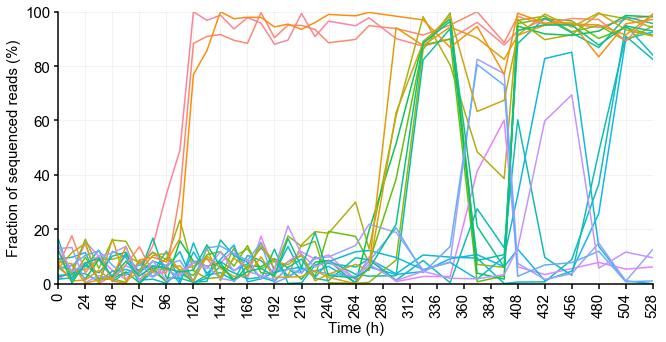

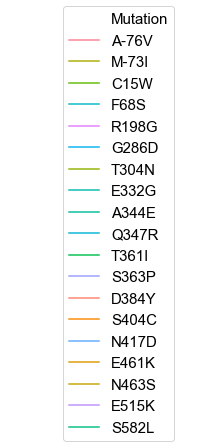

In [5]:
out_fn = results_dir + f'{dataset_nm}.pdf'

melt_df = df.melt(
    id_vars = 'Mutation',
    var_name = 'Time',
    value_name = 'Frequency (%)',
)
melt_df['Frequency (%)'] *= 100

import copy
mean_fqs = copy.copy(df)
mean_fqs['mean'] = df.apply('mean', axis = 'columns')
mean_fqs = mean_fqs.sort_values(by = 'mean', ascending = False)
muts = mean_fqs['Mutation']
# colors = sns.color_palette('hls', int(len(muts) * 1.2))
colors = sns.husl_palette(n_colors = int(len(muts) * 1.2), s = 1.0, l = 0.7)
palette = {mut: color for mut, color in zip(muts, colors)}

#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#

fig, ax = plt.subplots(figsize = (9.5, 5))

sns.lineplot(
    x = 'Time',
    y = 'Frequency (%)',
    hue = 'Mutation',
    palette = palette,
    ci = None,
    data = melt_df,
    linewidth = 1.5,
    ax = ax,
)
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax.get_legend().remove()
plt.xticks(rotation = 90)
plt.grid(alpha = 0.2)
plt.ylim(bottom = 0, top = 100)
plt.xlim(left = 0, right = 528)
plt.xticks(np.arange(0, 528 + 24, 24))
plt.xlabel('Time (h)')
plt.ylabel('Fraction of sequenced reads (%)')

# if title != '':
#     plt.title(title)

plt.tight_layout()

##

sns.despine(trim = True)
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

'''
    Save legend figure separately
    https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib
'''
fig_leg = plt.figure(figsize = (3, 3))
ax_leg = fig_leg.add_subplot(111)

# add the legend from the previous axes
ax_leg.legend(
    *ax.get_legend_handles_labels(), 
    loc = 'center',
    handler_map = {}
)

# hide the axes frame and the x/y labels
ax_leg.axis('off')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig_leg.savefig(results_dir + 'singlemut_trajs_legend.pdf', transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##